In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv("crime_in_india.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [3]:
df.dtypes

0        int64
1       object
2       object
3       object
4        int64
        ...   
123     object
124     object
125    float64
126     object
127    float64
Length: 128, dtype: object

In [4]:
df=np.where((df=="?")|(df=="?"),"0",df)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [5]:
df=pd.DataFrame(df)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,0,0,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14,0.2
1,53,0,0,Tukwilacity,1,0,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0,0,0,0,0,0,0.67
2,24,0,0,Aberdeentown,1,0,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0,0,0,0,0,0,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1,0.08,0.12,...,0.02,0.39,0.28,0,0,0,0,0,0,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0,0,0,0,0,0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,0,0,TempleTerracecity,10,0.01,0.4,0.1,0.87,0.12,...,0.01,0.28,0.05,0,0,0,0,0,0,0.09
1990,6,0,0,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.2,0,0,0,0,0,0,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [7]:
df[4].value_counts()

4     200
3     200
2     200
1     200
10    199
9     199
8     199
7     199
6     199
5     199
Name: 4, dtype: int64

In [8]:
x=df.iloc[:,4:-1]
y=df.iloc[:,-1]
x

,4,5,6,7,8,9,10,11,12,13,...,117,118,119,120,121,122,123,124,125,126
0,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,...,0.29,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14
1,1,0,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0,0.02,0.12,0.45,0,0,0,0,0,0
2,1,0,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0,0.01,0.21,0.02,0,0,0,0,0,0
3,1,0.04,0.77,1,0.08,0.12,0.1,0.51,0.5,0.34,...,0,0.02,0.39,0.28,0,0,0,0,0,0
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0,0.04,0.09,0.02,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,10,0.01,0.4,0.1,0.87,0.12,0.16,0.43,0.51,0.35,...,0,0.01,0.28,0.05,0,0,0,0,0,0
1990,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,...,0,0.02,0.37,0.2,0,0,0,0,0,0
1991,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.5,0.31,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,10,0.08,0.51,0.06,0.87,0.22,0.1,0.58,0.74,0.63,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


In [9]:
x=x.astype("float64")

In [10]:
pca=PCA(n_components=10)

In [11]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9
0,-4.500068,0.021601,0.704031,-1.627647,0.117538,-0.708700,-0.175300,-0.500564,0.225787,-0.162897
1,-4.496965,0.067460,0.148021,-0.025367,0.860938,0.544826,-0.889476,-0.395227,0.032482,-0.451427
2,-4.498743,0.347005,-0.729283,0.131614,-0.011193,0.118990,-0.160075,0.161025,0.671936,-0.338602
3,-4.466223,-0.679936,0.263765,0.346362,-0.511446,-0.332061,-0.777914,1.169556,0.357149,-0.025205
4,-4.473350,-1.248047,-0.506440,-0.048604,-0.461613,-0.447133,-0.224942,-0.061280,-0.037850,0.057908
...,...,...,...,...,...,...,...,...,...,...
1989,4.522188,-0.665877,0.033926,-0.119765,0.743819,-0.001648,-0.436989,-0.134786,-0.009558,0.179994
1990,4.514847,0.411864,1.393483,1.282353,0.888546,-0.157579,-0.506737,0.077751,-0.138671,0.207102
1991,4.481211,1.103125,0.798494,-1.233253,-0.786166,-0.077592,0.224415,-0.248082,-0.068982,-0.125475
1992,4.498360,0.054766,1.445216,-0.886435,0.081549,-0.194882,0.526547,-0.326781,-0.643202,-0.341509


In [12]:
y=y.astype("float64")

In [13]:
x[10]=y

In [14]:
x

,0,1,2,3,4,5,6,7,8,9,10
0,-4.500068,0.021601,0.704031,-1.627647,0.117538,-0.708700,-0.175300,-0.500564,0.225787,-0.162897,0.20
1,-4.496965,0.067460,0.148021,-0.025367,0.860938,0.544826,-0.889476,-0.395227,0.032482,-0.451427,0.67
2,-4.498743,0.347005,-0.729283,0.131614,-0.011193,0.118990,-0.160075,0.161025,0.671936,-0.338602,0.43
3,-4.466223,-0.679936,0.263765,0.346362,-0.511446,-0.332061,-0.777914,1.169556,0.357149,-0.025205,0.12
4,-4.473350,-1.248047,-0.506440,-0.048604,-0.461613,-0.447133,-0.224942,-0.061280,-0.037850,0.057908,0.03
...,...,...,...,...,...,...,...,...,...,...,...
1989,4.522188,-0.665877,0.033926,-0.119765,0.743819,-0.001648,-0.436989,-0.134786,-0.009558,0.179994,0.09
1990,4.514847,0.411864,1.393483,1.282353,0.888546,-0.157579,-0.506737,0.077751,-0.138671,0.207102,0.45
1991,4.481211,1.103125,0.798494,-1.233253,-0.786166,-0.077592,0.224415,-0.248082,-0.068982,-0.125475,0.23
1992,4.498360,0.054766,1.445216,-0.886435,0.081549,-0.194882,0.526547,-0.326781,-0.643202,-0.341509,0.19


In [15]:
x.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object

In [16]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000
mean,-2.063211e-15,4.387441e-17,6.080058e-17,-9.882878e-18,9.409613e-18,7.672454e-17,1.594275e-16,-6.013244e-17,5.908847e-18,-1.330987e-16,0.237979
std,2.874336e+00,1.050782e+00,9.209140e-01,7.089103e-01,5.464891e-01,4.865100e-01,4.053328e-01,3.999957e-01,3.612341e-01,3.272701e-01,0.232985
min,-4.531728e+00,-2.680152e+00,-1.485615e+00,-2.234917e+00,-1.561117e+00,-1.719323e+00,-1.118592e+00,-1.521138e+00,-1.168468e+00,-9.556021e-01,0.000000
25%,-2.498542e+00,-7.771529e-01,-6.868692e-01,-2.068285e-01,-3.635638e-01,-3.223663e-01,-3.100712e-01,-2.507537e-01,-2.357179e-01,-2.089637e-01,0.070000
50%,-4.503799e-01,4.951512e-02,-2.074727e-01,1.187290e-02,-5.164322e-02,-6.347013e-03,1.295229e-02,-4.776115e-02,3.922836e-03,-6.549311e-03,0.150000
75%,2.504753e+00,7.562817e-01,5.496738e-01,2.609644e-01,2.718464e-01,3.248685e-01,3.046098e-01,2.142894e-01,2.610073e-01,1.939828e-01,0.330000
max,4.550460e+00,3.148472e+00,3.511859e+00,2.712545e+00,2.369917e+00,1.849869e+00,1.299972e+00,1.644000e+00,1.270352e+00,1.323249e+00,1.000000


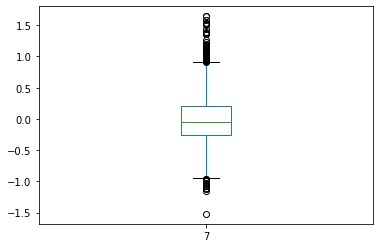

In [17]:
x[7].plot(kind="box")

In [18]:
z=np.abs(zscore(x))
np.where(z>3)

(array([  24,   32,   39,   72,   82,   84,   87,   97,  116,  128,  146,
         149,  155,  160,  166,  192,  203,  209,  243,  248,  249,  268,
         291,  296,  298,  305,  317,  325,  333,  336,  349,  362,  368,
         368,  399,  400,  410,  413,  413,  420,  447,  457,  462,  462,
         471,  477,  499,  564,  564,  573,  573,  587,  589,  600,  621,
         636,  640,  641,  646,  660,  667,  667,  668,  675,  678,  682,
         687,  692,  699,  757,  776,  809,  810,  828,  841,  850,  858,
         861,  864,  877,  909,  914,  917,  955,  955,  957,  957,  994,
         994,  998,  998, 1001, 1011, 1025, 1028, 1041, 1044, 1044, 1056,
        1060, 1070, 1081, 1081, 1119, 1124, 1134, 1134, 1146, 1154, 1154,
        1159, 1160, 1171, 1187, 1208, 1229, 1262, 1270, 1273, 1274, 1295,
        1298, 1350, 1353, 1364, 1364, 1378, 1402, 1413, 1447, 1470, 1470,
        1477, 1486, 1523, 1534, 1559, 1563, 1585, 1601, 1607, 1612, 1629,
        1638, 1638, 1662, 1669, 1684, 

In [19]:
df=x[(z<3).all(axis=1)]
df.shape

(1844, 11)

In [20]:
df.skew()

0    -0.008055
1    -0.070627
2     0.848461
3    -0.285090
4     0.523514
5    -0.026712
6    -0.029705
7     0.371913
8    -0.032344
9     0.068003
10    1.383483
dtype: float64

In [24]:
df[10]=np.log1p(df[10])

<ipython-input-24-116d3758aba4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[10]=np.log1p(df[10])


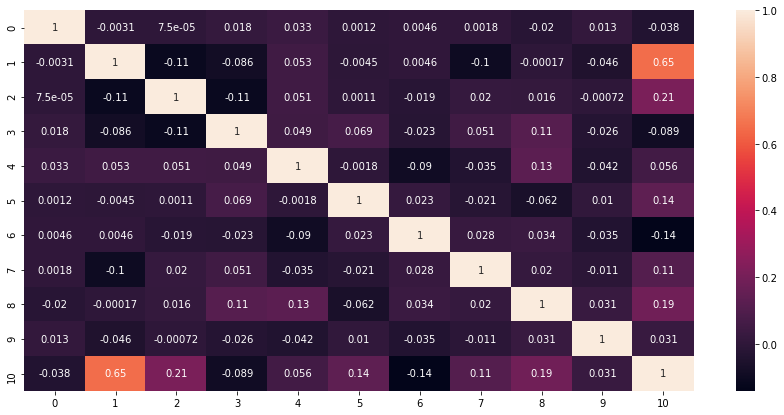

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

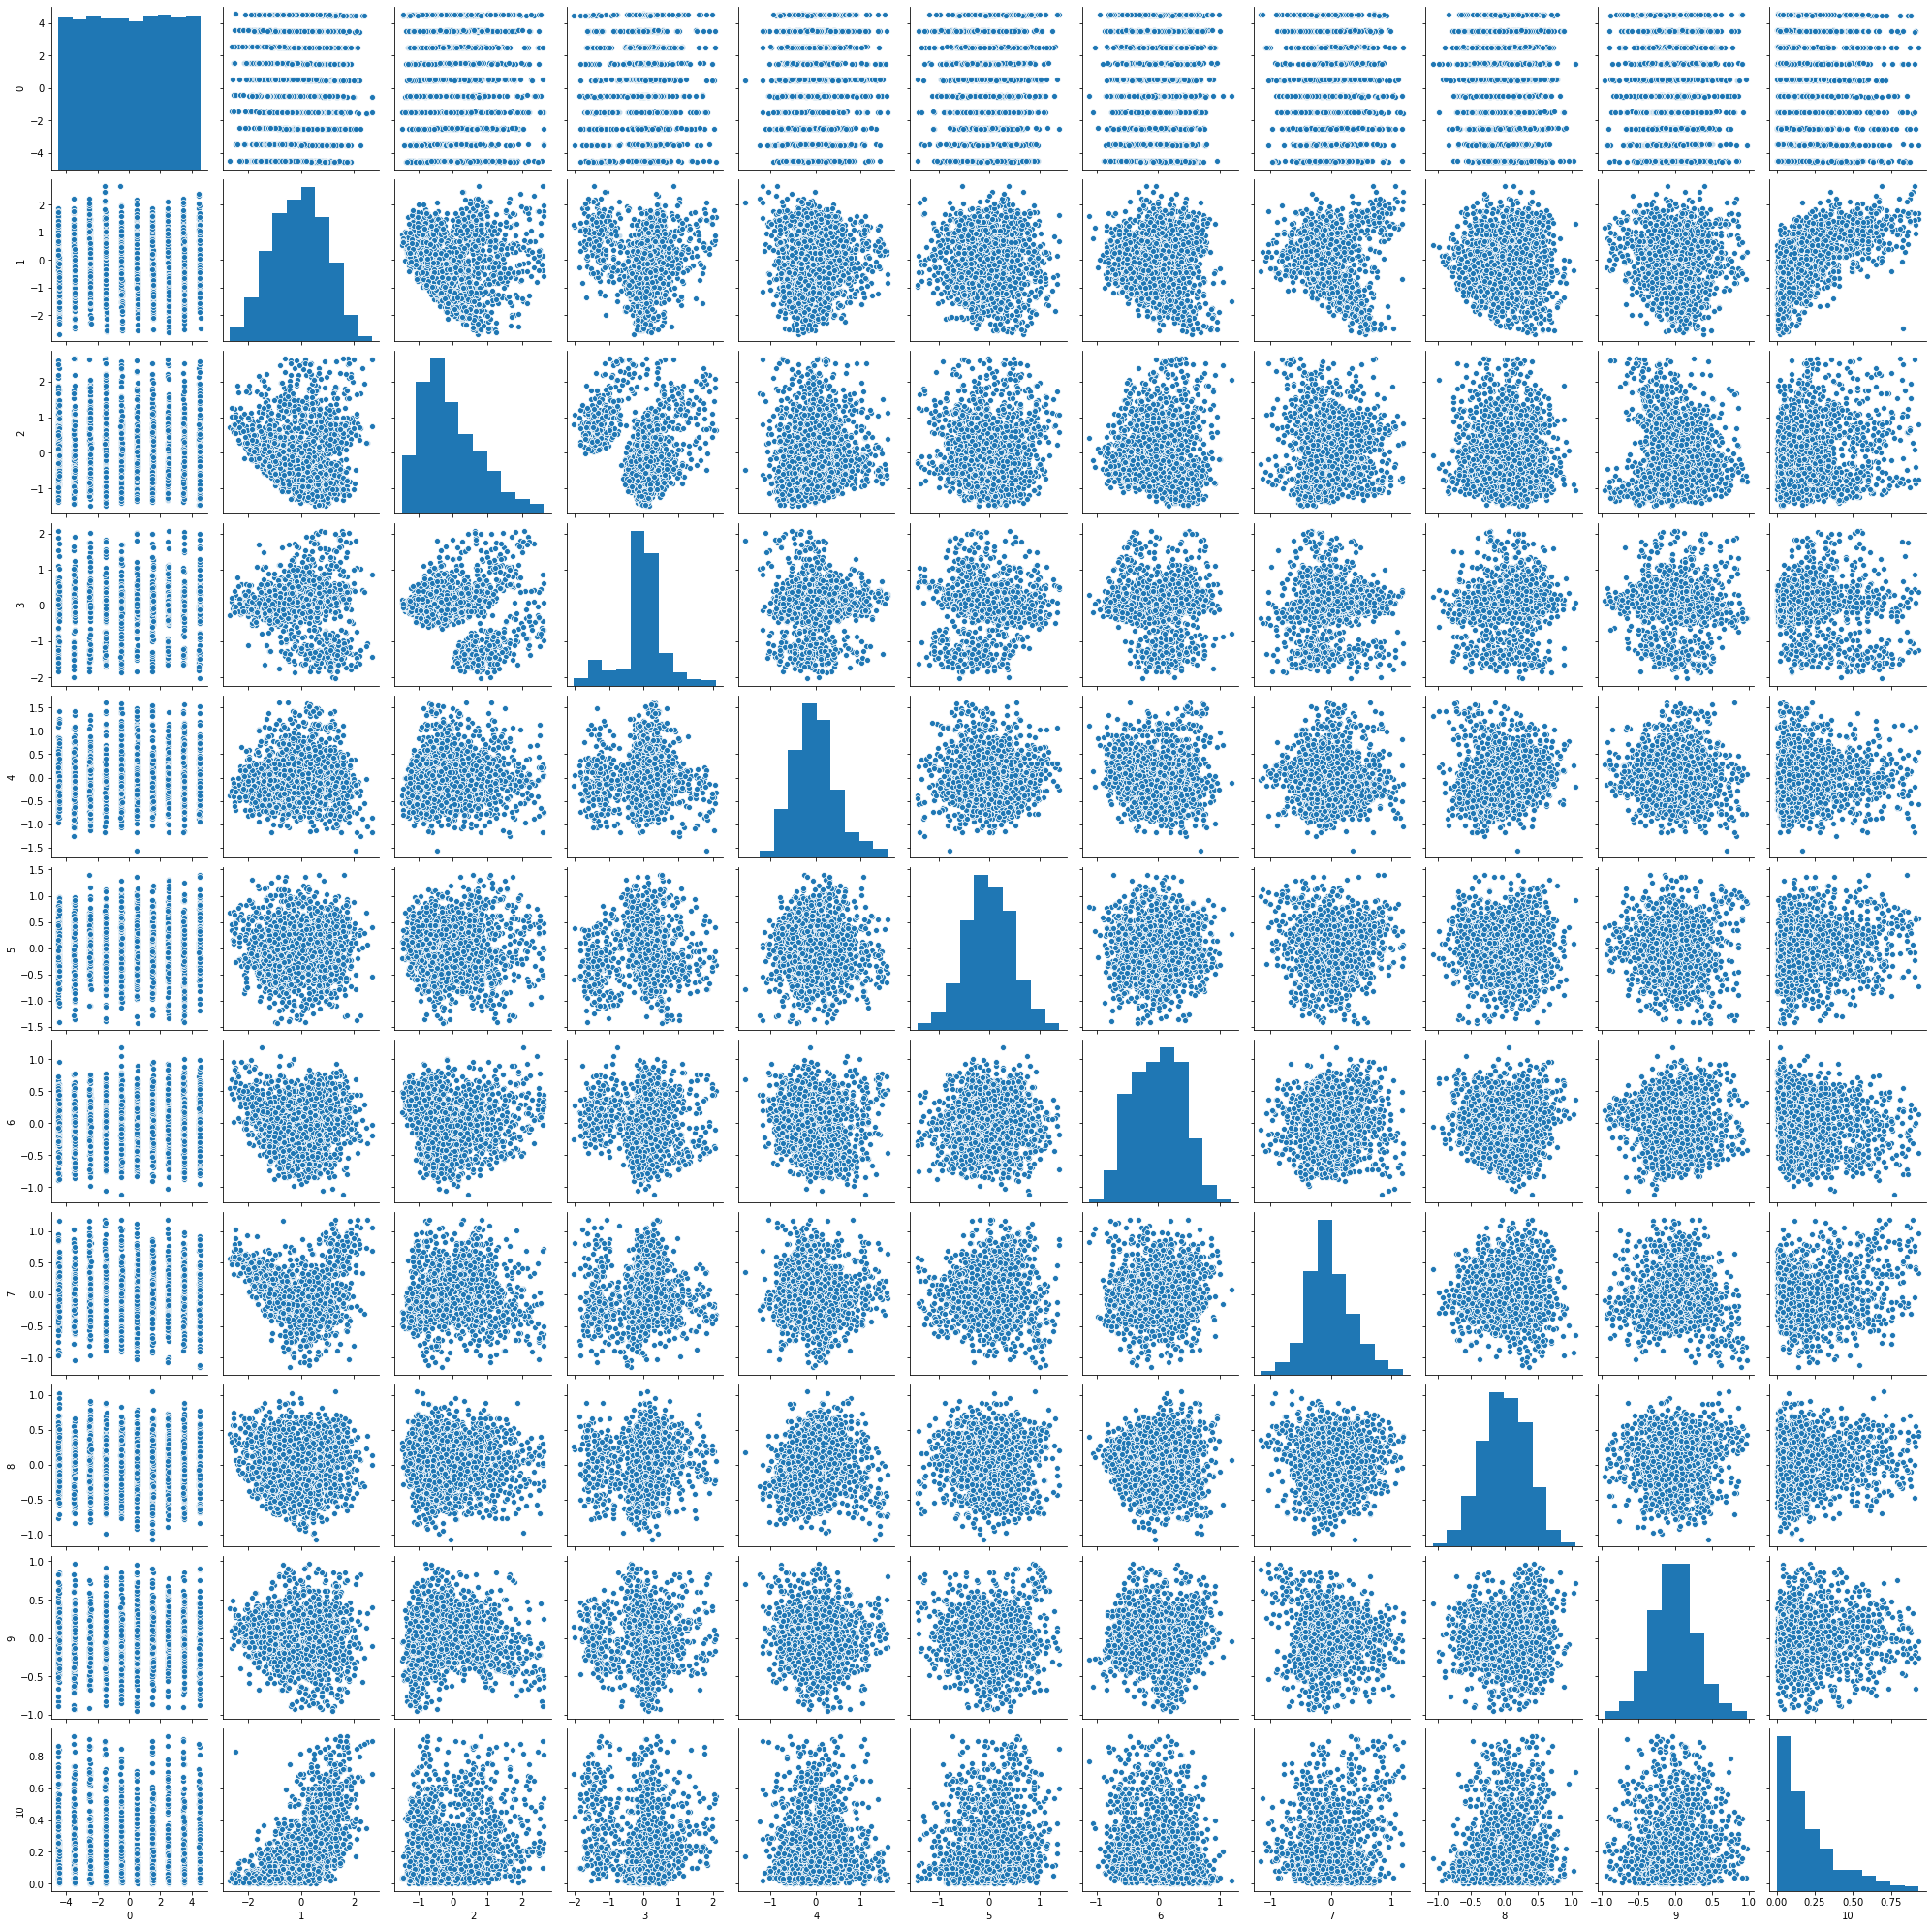

In [22]:
sns.pairplot(df)

In [26]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [29]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 52 is 0.6865558062635349
MSE: 0.0880367995148723


In [30]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    kn=KNeighborsRegressor()
    kn.fit(x_train,y_train)
    pred=kn.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 145 is 0.5595628327050735
MSE: 0.10801795826710082


In [31]:
from sklearn.ensemble import AdaBoostRegressor

max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    ad=AdaBoostRegressor()
    ad.fit(x_train,y_train)
    pred=ad.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 151 is 0.5310517405607191
MSE: 0.11364185383687657


In [32]:
cross=cross_val_score(lg,x,y,cv=6)
print(cross.mean())
print(cross)

0.6174026729340737
[0.60400688 0.53657178 0.66607549 0.6541067  0.61150112 0.63215407]


In [33]:
import joblib

joblib.dump(lg,"crime_in_india_model.pkl")

['crime_in_india_model.pkl']